## AUTOML COMO PRIMERA APROXIMACIÓN

In [1]:
import pandas as pd

import * ➡️ Importar todo

In [2]:
import pycaret
from pycaret.classification import *

In [4]:
df_bank=pd.read_csv('bank-full.csv', sep=';')

In [5]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df_bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Creo la variable model_setup, instacio el setup. __Parámetros__:

    - data
    - target
    - session_id: experimento

In [8]:
model_setup = setup(data=df_bank, target='y', session_id=1)

,Description,Value
0,Session id,1
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Ordinal features,3
9,Numeric features,7


Todos los modelos que ha utilizado y los que no 

In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True




Me dice los modelos que ha utilizado, sus métricas y el tiempo empleado

In [13]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9080,0.9358,0.5013,0.6411,0.5625,0.5120,0.5169,0.2200
xgboost,Extreme Gradient Boosting,0.9076,0.9320,0.5016,0.6386,0.5618,0.5109,0.5157,1.5650
gbc,Gradient Boosting Classifier,0.9063,0.9258,0.4224,0.6629,0.5157,0.4666,0.4814,1.5340
rf,Random Forest Classifier,0.9052,0.9272,0.3919,0.6698,0.4941,0.4457,0.4655,0.9080
lr,Logistic Regression,0.9007,0.9025,0.3462,0.6506,0.4516,0.4026,0.4271,2.1780
lda,Linear Discriminant Analysis,0.9006,0.9073,0.4443,0.6088,0.5135,0.4596,0.4668,0.1730
ada,Ada Boost Classifier,0.9002,0.9120,0.3890,0.6249,0.4793,0.4274,0.4422,0.3800
ridge,Ridge Classifier,0.8991,0.0000,0.2812,0.6756,0.3969,0.3519,0.3926,0.0310
et,Extra Trees Classifier,0.8989,0.9062,0.3451,0.6316,0.4462,0.3958,0.4178,1.0610
dummy,Dummy Classifier,0.8819,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0380


# Modelo rf

In [14]:
model_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9058,0.9307,0.3663,0.6919,0.4790,0.4326,0.4592
1,0.9115,0.9300,0.4064,0.7238,0.5205,0.4760,0.5002
2,0.9033,0.9225,0.3690,0.6635,0.4742,0.4257,0.4480
3,0.9014,0.9191,0.3930,0.6336,0.4851,0.4339,0.4491
4,0.9087,0.9308,0.4171,0.6872,0.5191,0.4720,0.4900
5,0.8998,0.9251,0.4011,0.6173,0.4862,0.4335,0.4459
6,0.9017,0.9328,0.3877,0.6388,0.4825,0.4318,0.4483
7,0.9046,0.9304,0.3727,0.6715,0.4793,0.4315,0.4542
8,0.9049,0.9222,0.3780,0.6714,0.4837,0.4358,0.4577


# Hiperparámetros

Imprimir todos los hiperparámetros, pero sin imputar, por defecto

In [15]:
print(model_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


# Tuneo de hiperparámetros 

In [17]:
tune_model_rf = tune_model(model_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8913,0.8508,0.4385,0.5503,0.4881,0.4282,0.4316
1,0.8869,0.8260,0.1257,0.6026,0.2080,0.1743,0.2385
2,0.8825,0.8224,0.0963,0.5143,0.1622,0.1297,0.1845
3,0.8882,0.8317,0.1176,0.6471,0.1991,0.1689,0.2428
4,0.8869,0.8520,0.1337,0.5952,0.2183,0.1829,0.2440
5,0.8878,0.8289,0.1364,0.6145,0.2232,0.1884,0.2523
6,0.8875,0.8331,0.1337,0.6098,0.2193,0.1846,0.2484
7,0.8872,0.8431,0.1367,0.5930,0.2222,0.1863,0.2463
8,0.8897,0.8579,0.4424,0.5392,0.4860,0.4249,0.4275


In [18]:
print(tune_model_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=8, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


# Análisis e Interpretabilidad

### Importancia de las variables = Correlación con la target

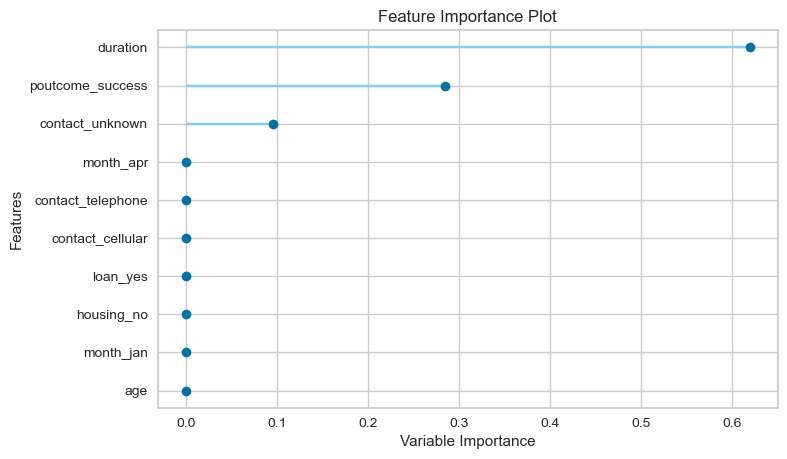

In [19]:
plot_model(tune_model_rf, plot='feature')

### Curva Roc

Tanto para la clase no como para la clase sí

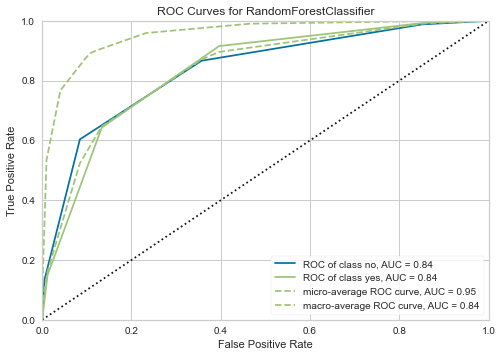

In [20]:
plot_model(tune_model_rf, plot='auc')

### Matriz de confusión 

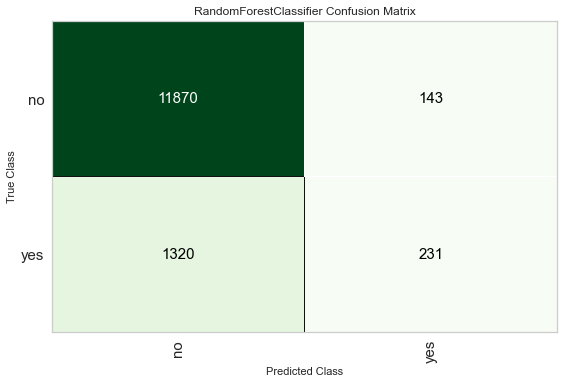

In [21]:
plot_model(tune_model_rf, plot='confusion_matrix')